In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Imputer, OneHotEncoder, PolynomialFeatures, FunctionTransformer, MaxAbsScaler
from sklearn.feature_selection import chi2, SelectKBest

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Trevor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
%%time
df = pd.read_csv("train.csv")

Wall time: 30.8 s


In [16]:
df.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [17]:
df.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 47 columns):
id                                     int64
target                                 float64
comment_text                           object
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float

### EDA


In [19]:
df["comment_length"] = df["comment_text"].apply(lambda x: len(x))

Text(0.5,1,'Comment Length')

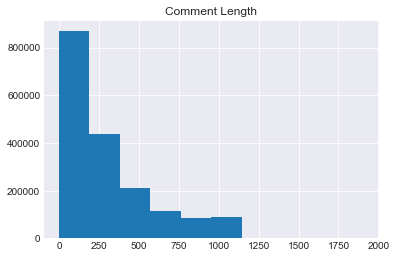

In [20]:
plt.hist(df["comment_length"])
plt.title("Comment Length")

Text(0.5,1,'Toxicity')

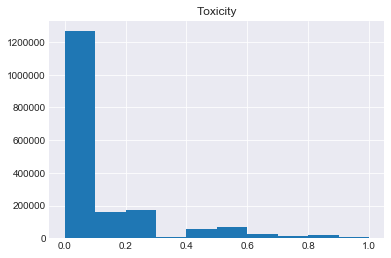

In [21]:
plt.hist(df["target"])
plt.title("Toxicity")

In [22]:
df["target_binary"] = df["target"].apply(lambda x: 1 if x >= 0.5 else 0)

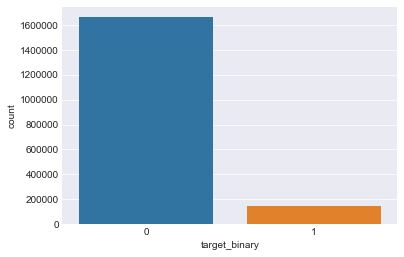

In [23]:
sns.countplot(x="target_binary",data=df)

In [24]:
df["target_binary"].sum()/len(df["target_binary"])

0.0799690172277954

Serious data imbalance, only 8% of comments are toxic. Will most likely need to employ sampling techniques such as Down, UP , ROSE or SMOTE.

In [25]:
corr_matrix = df.drop(["id","target_binary"], axis = 1).corr()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 <a list of 42 Text xticklabel objects>)

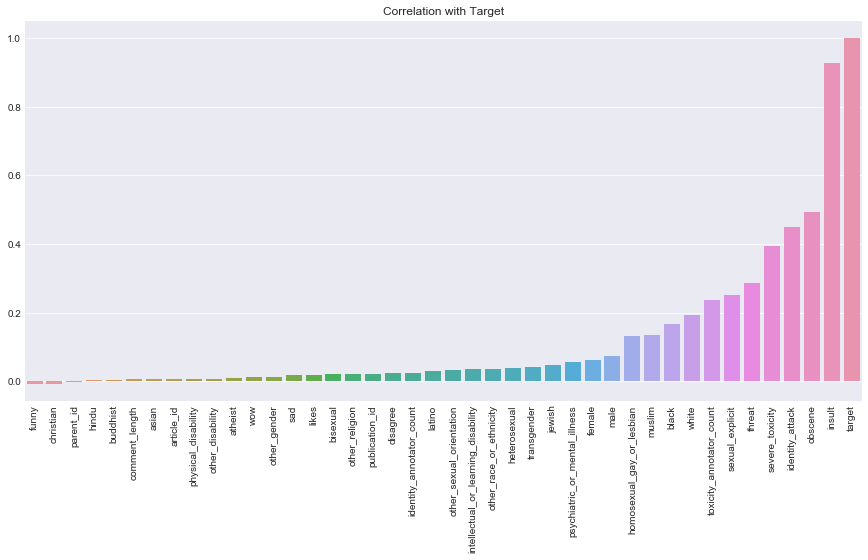

In [33]:
plt.figure(figsize=(15,7))
sns.barplot(x = corr_matrix["target"].sort_values().index, y = corr_matrix["target"].sort_values().values)
plt.title("Correlation with Target")
plt.xticks(rotation="vertical")

Analysis on Time Features

In [45]:
df["created_date"] = pd.to_datetime(df["created_date"])
df["day_of_week"] = df["created_date"].apply(lambda x: x.dayofweek)
df["day_of_year"] = df["created_date"].apply(lambda x: x.dayofyear)
df["month"] = df["created_date"].apply(lambda x: x.month)
df["hour"] = df["created_date"].apply(lambda x: x.hour)

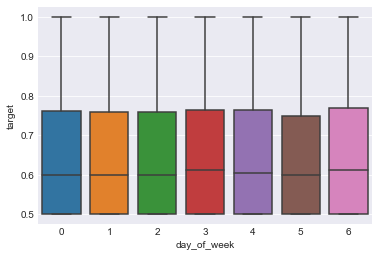

In [57]:
sns.boxplot(x="day_of_week",y="target", data=df[df["target_binary"]==1])

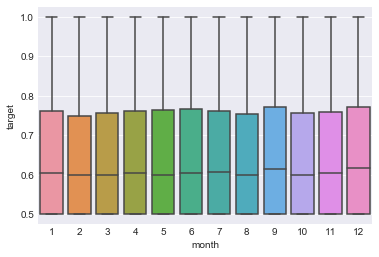

In [56]:
sns.boxplot(x="month",y="target", data=df[df["target_binary"]==1])

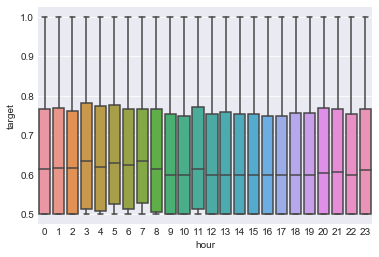

In [55]:
sns.boxplot(x="hour",y="target", data=df[df["target_binary"]==1])

### Split into 90/10 Train and Validation

In [76]:
split = 0.9
split_index = round(len(df)*split)

X = df.drop(["target","target_binary"],axis=1)
y = df["target_binary"]

X_train = X.iloc[:split_index,:]
y_train = y.iloc[:split_index]

X_val = X.iloc[split_index:,:]
y_val = y.iloc[split_index:]

### Simple n-gram Models

In [64]:
NUMERIC_COLUMNS = ["comment_length"]
CATEGORICAL_COLUMNS = ["day_of_week","day_of_year","month","hour"]

stop_words = stopwords.words('english')

In [68]:


# Select 300 best features
chi_k = 300

# Perform preprocessing
get_text_data = FunctionTransformer(lambda x: x["comment_text"], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)
get_categorical_data = FunctionTransformer(lambda x: x[CATEGORICAL_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

# Instantiate pipeline: pl
p1 = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', Imputer())
                ])),
                ('categorical_features', Pipeline([
                    ('selector', get_categorical_data),
                    ('one_hot_encoder', OneHotEncoder())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer(ngram_range=(1,2),
                                                   stop_words=stop_words,
                                                   token_pattern=TOKENS_ALPHANUMERIC)),
                    ('dim_red', SelectKBest(chi2, chi_k))
                ]))
             ]
        )),
        ('scale', MaxAbsScaler()),
        ('int', PolynomialFeatures(2)),
        ('clf', LogisticRegression())
    ])

In [ ]:
m1 = p1.fit(X_train,y_train)